# Problems
---
### Reversing the string
Given a string, write a function that returns the reverse of the string. For example, given the string "hello", the function should return "olleh". This requires the usage of stack. 
1. Create an empty stack and add each character from the string to it using `append()`.
2. Pop each character from the stack and append it to the resulting reversed string using `pop()`.

*This might seem a stupid problem, but it is a good exercise to understand the stack data structure.*

In [ ]:
def str_reverse(string: str) -> str:
    # append characters from string to the list
    stack = []
    for char in string:
        stack.append(char)
    
    # pop from the end of the list and add the character to the end of a reversed string
    str_reverse = ''
    while stack:
        str_reverse += stack.pop()
    
    return str_reverse

str_reverse('perturbation')

'noitabrutrep'

---
### Matching bracket
Check if bracket in an expression are matching. This can be easily solved using a `counter = 'opening bracket'-'closing bracket'`.  **Use a stack instead**, because for the multiple brackets in the problem below, you will really need it! Here is the function to finish:
```python
def bracket_check(expression: str) -> bool:
    """Returns True if the bracket in string match, such as `(a+(b+c)/2)`.
    Returns False otherwise, for example for `(a+(b+c)/2`
    """
    ...

bracket_check("(aaa )()")
```
1. Create an empty stack, 
2. go through the expression element by element, if you find an opening bracket, add it to the stack. If you find closing bracket and there is some opening bracket in the stack, remove the last opening bracket.*


In [23]:
def bracket_check(expression: str) -> bool:
    """Returns True if the bracket in string match, such as `(a+(b+c)/2)`.
    Returns False otherwise, for example for `(a+(b+c)/2`. Expression contains only '(' and ')' brackets.
    """
    stack = []
    for char in expression:
        if char == '(':
            stack.append(char)
        elif char == ')':
            if not stack:
                return False
            stack.pop()
    
    return not stack

bracket_check("(aaa )()")

False

#### Advanced version:
Assume there are multiple types of brackets in the expression, `()`, `[]`, `{}`. Check if the brackets are matching.

In [26]:
def bracket_check_combined(expression: str) -> bool:
    """Returns True if the bracket in string match, such as `(a[]+({b}+{c[]})/2)`.
    Returns False otherwise, for example for `{a+(b+c[])/2`
    """
    stack = []
    for char in expression:
        if char in '([{':
            stack.append(char)
        elif char in ')]}':
            if not stack:
                return False
            if char == ')' and stack[-1] == '(' or char == ']' and stack[-1] == '[' or char == '}' and stack[-1] == '{':
                stack.pop()
            else:
                return False
    
    return not stack

bracket_check_combined('(k[22[ {}s]()ss])')

True

---
### Dice rolling
Simulate 1000 dice rolls (you can increase the number of dice sides) and plot the distribution of the results. Count the number of times each number is rolled and plot the results using a bar chart.

**You can use `random.randint(min,max)` function to simulate a dice roll.*

In [19]:
import random
import matplotlib.pyplot as plt

n = 1000  # number of rolls
sides = 6 # number of sides

throws = [random.randint(0,sides) for _ in range(n)]
nums = [throws.count(k) for k in range(sides)]
nums

[146, 151, 120, 144, 139, 152]

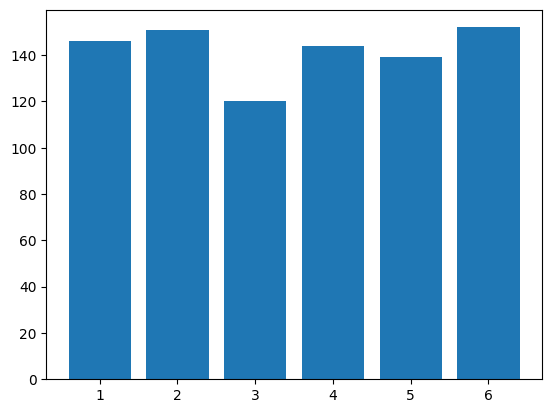

In [21]:
plt.bar(range(sides), nums)
plt.xticks(range(sides), range(1,sides+1))
plt.show()

---
### Monte Carlo
Generate many random points in square 1x1 and count how many of them are inside the circle inscribed in the square (with radius 0.5). Use this to estimate the value of pi.

**You can use `random.uniform(-1, 1)` for generating the random number.*

In [35]:
import random

n = int(1e5)

num_inside = 0 # number of points inside the circle
for _ in range(n):
    x, y = random.uniform(-1, 1), random.uniform(-1, 1)
    if x**2 + y**2 <= 1:
        num_inside += 1

print(4*num_inside/n)

3.14252


---
# Problematic problems
### Fermat's little theorem
Use the [Fermat's little theorem](https://en.wikipedia.org/wiki/Fermat's_little_theorem) to check if a number is "probably prime". The trick is to test it for a few random numbers, not all of them. How many is needed to give a prediction with a reasonable certainty?

The theorem claims that if $p$ is prime, then for **any** integer $a$ it holds $$a^{p-1} \equiv 1 \pmod p$$

In [29]:
import random

def little_fermat(n:int, k=4):
    # testing the divisor n
    def fermat_test(a, n):
        if pow(a, n - 1, n) != 1:
            return False
        return True

    # try the test k times for random integers
    for _ in range(k):
        a = random.randint(2, n - 2)
        if not fermat_test(a, n):
            return False

    return True

print(little_fermat(263130836933693530167218012159999999-2))
print(little_fermat(8683317618811886495518194401279999999))

False
True
